<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 1</h3>
    <h5>Ejercicio 1</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
 <p>
</div>

In [ ]:
# !pip install yfinance

Importamos algunos de los modulos a utilizar

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import pandas_market_calendars as mcal

import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

####  Leemos los datos a trabajar

Lo hacemos mediante descargando datos de mercado a través de la API de Yahoo finanzas

Documentacion = https://pypi.org/project/yfinance/


In [ ]:
# Obtenga datos cercanos de Yahoo Finance para la YPF Sociedad Anónima (YPF)
ticker_list = ['YPF']
data = yf.download(ticker_list, start='2018-01-01', end='2024-05-29')[['Adj Close']]
precios_ajustados = data.rename(columns={'Adj Close': 'Adj_Close'})  # Modificamos el nombre unicamente por comodidad de manejo de la variable
# Primera aproximacion a los datos
precios_ajustados.head()

[*********************100%***********************]  1 of 1 completed


,Adj_Close
Date,
2018-01-02,23.311460
2018-01-03,23.272018
2018-01-04,22.966326
2018-01-05,22.690216
2018-01-08,23.419931


#### Breve resumen del dataset


In [ ]:
precios_ajustados.describe()

,Adj_Close
count,1611.000000
mean,10.440138
std,5.896411
min,2.570000
25%,4.640000
50%,9.590000
75%,14.950330
max,25.904911


In [ ]:
precios_ajustados.mean()

,0
Adj_Close,10.440138


In [ ]:
precios_ajustados.var()

,0
Adj_Close,34.767664


In [ ]:
precios_ajustados.dtypes

,0
Adj_Close,float64


In [ ]:
print(precios_ajustados.index.dtype)

datetime64[ns]


In [ ]:
precios_ajustados.isna().sum()

,0
Adj_Close,0


In [ ]:
precios_ajustados.head(10)

,Adj_Close
Date,
2018-01-02,23.311460
2018-01-03,23.272018
2018-01-04,22.966326
2018-01-05,22.690216
2018-01-08,23.419931
2018-01-09,23.429792
2018-01-10,23.597431
2018-01-11,24.386312
2018-01-12,24.701864


Visualizaciones de las variables

Text(0.5, 1.0, 'Histograma de YPF')

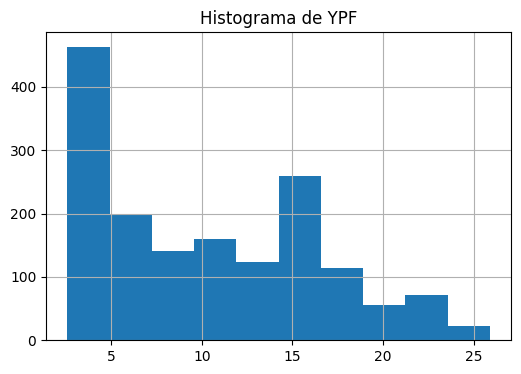

In [ ]:
# Histogramas
precios_ajustados.Adj_Close.hist()
plt.title('Histograma de YPF')

Text(0.5, 1.0, 'Histograma de YPF')

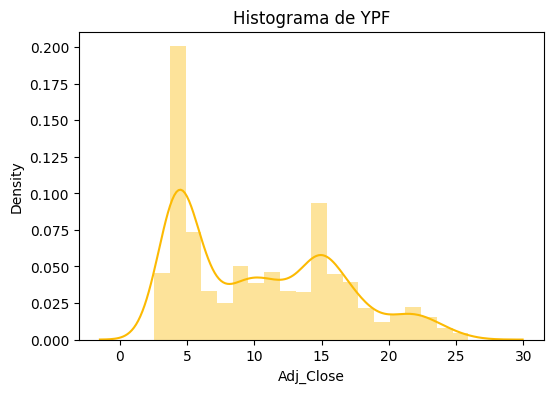

In [ ]:
sns.distplot(precios_ajustados['Adj_Close'],bins=20,color='#fcba03')
plt.title('Histograma de YPF')

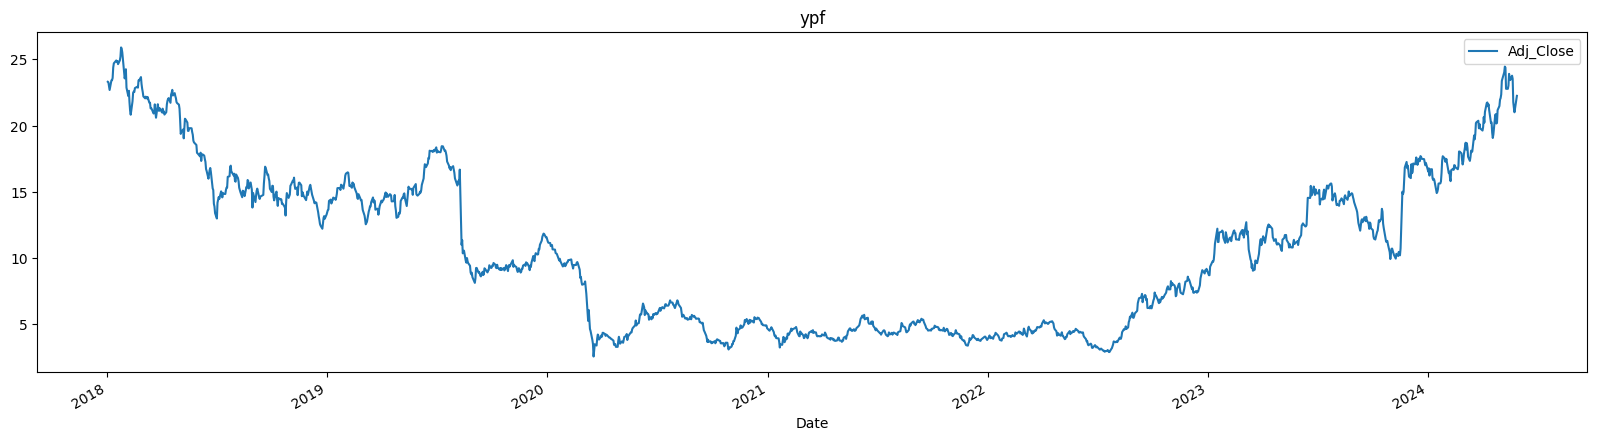

In [ ]:
precios_ajustados.plot(figsize=(20,5), title = "ypf")
plt.show()

Descomposición de Series Temporales

In [ ]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

Descomposicion Aditiva

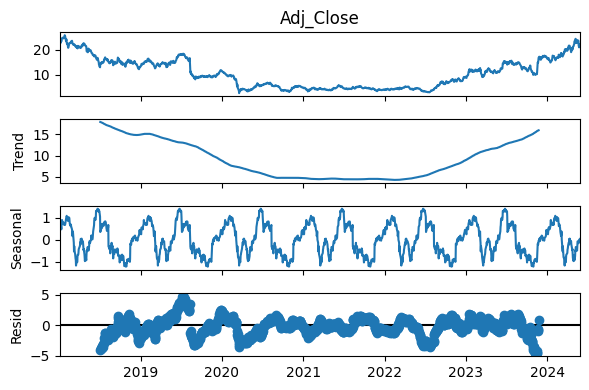

In [ ]:
# Realizar la descomposición estacional aditiva
result = seasonal_decompose(precios_ajustados['Adj_Close'], model='additive', period=252)

'''
"period=252" indica un ciclo completo anual basado en los días hábiles del mercado, que se usa con frecuencia en series temporales financieras.
'''

# Graficar los resultados
result.plot()
plt.show()

Descomposicion Multiplicativa

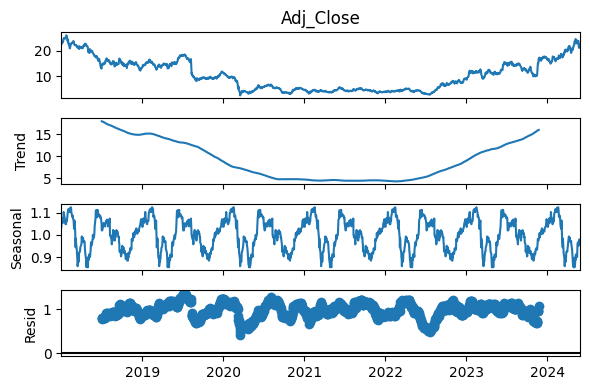

In [ ]:
# Realizar la descomposición estacional multiplicativa
result = seasonal_decompose(precios_ajustados['Adj_Close'], model='multiplicative' , period=252)

# Graficar los resultados
result.plot()
plt.show()

Representación gráfica de la Función de Autocorrelación

In [ ]:
# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import matplotlib

In [ ]:
matplotlib.rcParams['figure.figsize']=[6.0,4.0]

Grafico ACF del ejemplo en cuestion - YPF

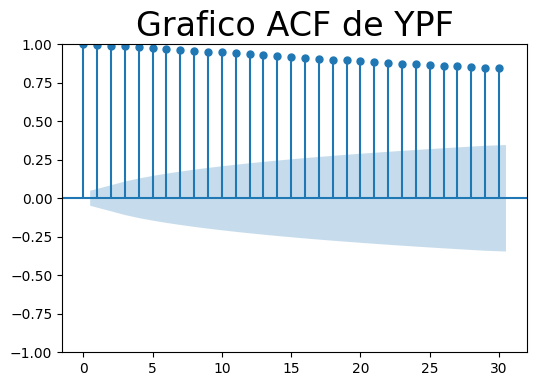

In [ ]:
plot_acf(precios_ajustados.Adj_Close,lags=30)
plt.title("Grafico ACF de YPF", size= 24)
plt.show()

APLICAMOS UNA TRANSFORMACION DE LA SERIE

In [ ]:
primera_diffs=precios_ajustados.Adj_Close.values[1:]-precios_ajustados.Adj_Close.values[:-1]
primera_diffs=np.concatenate([primera_diffs,[0]])

In [ ]:
precios_ajustados['primera_diffs_spx']=primera_diffs

In [ ]:
precios_ajustados.head()

,Adj_Close,primera_diffs_spx
Date,,
2018-01-02,23.311460,-0.039442
2018-01-03,23.272018,-0.305693
2018-01-04,22.966326,-0.276110
2018-01-05,22.690216,0.729715
2018-01-08,23.419931,0.009861


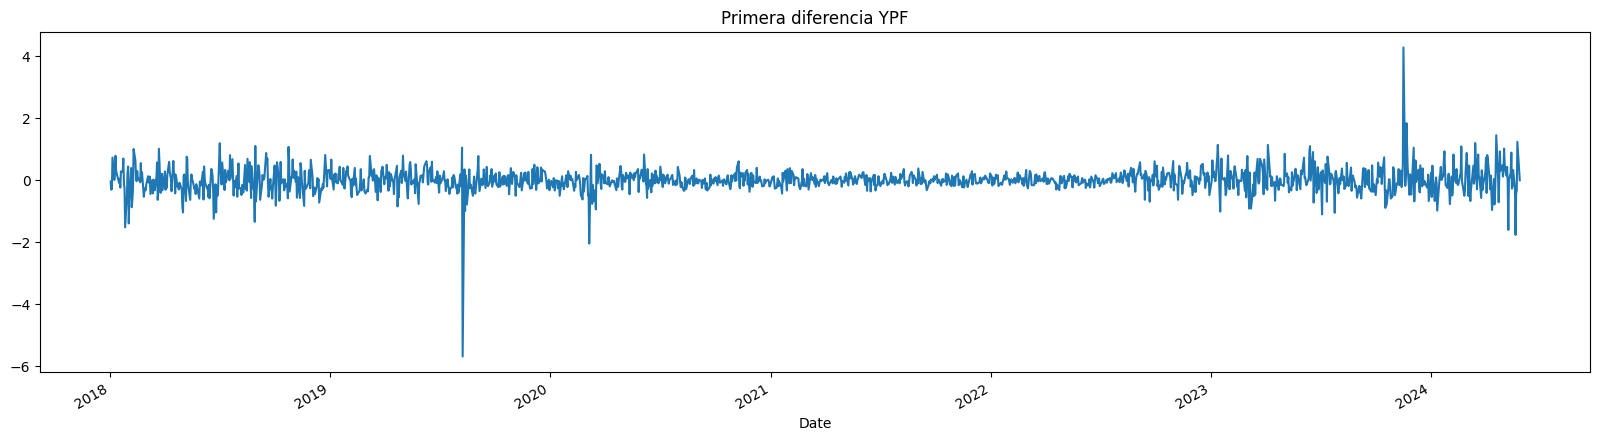

In [ ]:
#grafico este indice con las diferencias aplicadas fila a fila
precios_ajustados.primera_diffs_spx.plot(figsize=(20,5), title = "Primera diferencia YPF")
plt.show()

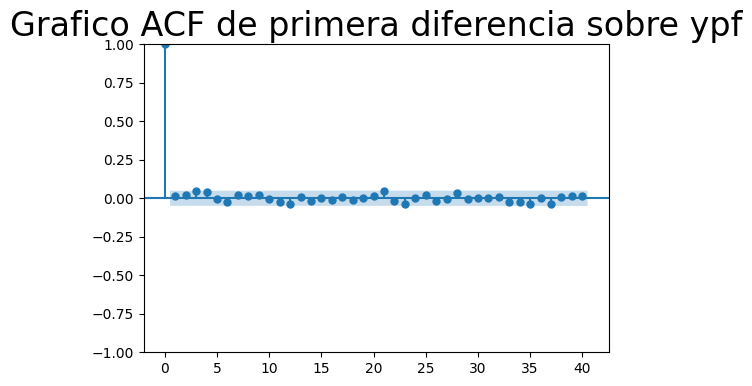

In [ ]:
#grafico este indice con las diferencias aplicadas fila a fila

plot_acf(precios_ajustados.primera_diffs_spx,lags=40)
plt.title("Grafico ACF de primera diferencia sobre ypf", size= 24)
plt.show()

Ruido Blanco

Simulación de ruido blanco
Aqui generamos una serie de valores aleatorios que siguen una distribución normal, con la misma media y desviación estándar que la serie temporal de precios ajustados. Aqui podemos tener propiedades similares a las de la serie exportada de yf.

In [ ]:
wn = np.random.normal(loc = precios_ajustados.Adj_Close.mean(), scale = precios_ajustados.Adj_Close.std(), size = len(precios_ajustados))
precios_ajustados['wn'] = wn
precios_ajustados.describe()

,Adj_Close,primera_diffs_spx,wn
count,1611.000000,1611.000000,1611.000000
mean,10.440138,-0.000659,10.345121
std,5.896411,0.378217,5.857092
min,2.570000,-5.680000,-7.222588
25%,4.640000,-0.170000,6.426894
50%,9.590000,0.000000,10.456863
75%,14.950330,0.163819,14.146301
max,25.904911,4.280001,28.973993


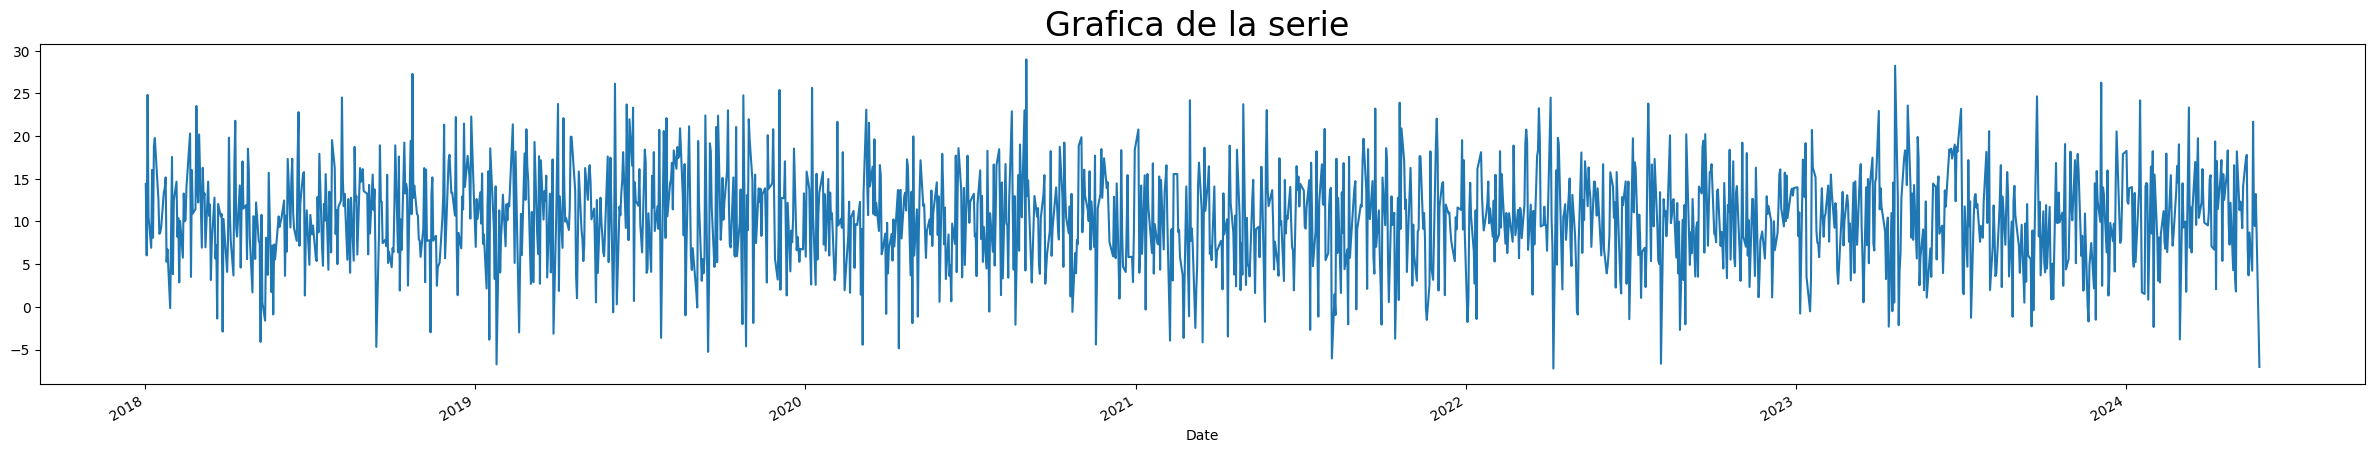

In [ ]:
precios_ajustados.wn.plot(figsize = (30,5))
plt.title("Grafica de la serie ", size= 24)
plt.show()

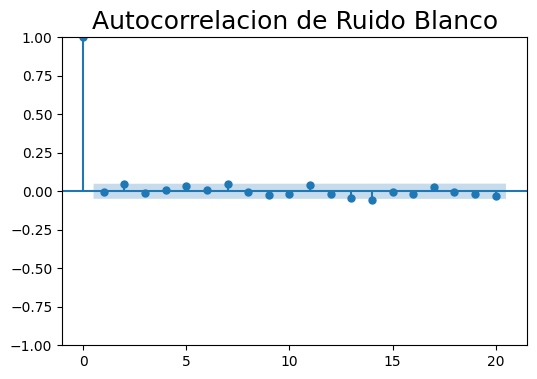

In [ ]:
plot_acf(precios_ajustados.wn, lags=20)
plt.title("Autocorrelacion de Ruido Blanco", size= 18)
plt.show()

Random Walk

In [ ]:
# Simulamos el proceso
steps = np.random.standard_normal(1000)
steps[0]=0
random_walk=np.cumsum(steps)

In [ ]:
random_walk[:10]

array([ 0.        , -0.32750533, -1.06148049, -0.77754973, -1.57899031,
       -3.10663258, -4.35916724, -4.18831681, -4.59618636, -4.89176436])

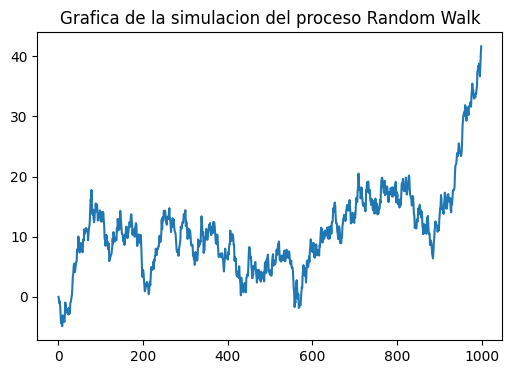

In [ ]:
plt.plot(random_walk)
plt.title("Grafica de la simulacion del proceso Random Walk")
plt.show()

In [ ]:
random_walk_acf_coef = acf(random_walk)
random_walk_acf_coef

array([1.        , 0.98030444, 0.96268303, 0.94522003, 0.92968084,
       0.91319834, 0.89620126, 0.87952158, 0.86303803, 0.84665957,
       0.83022016, 0.8156259 , 0.80056291, 0.78601709, 0.77060715,
       0.7554616 , 0.7408332 , 0.72792898, 0.71393075, 0.69885391,
       0.68448472, 0.66970383, 0.65415168, 0.63973903, 0.62545221,
       0.61236582, 0.59817409, 0.58470994, 0.57129066, 0.5583137 ,
       0.54595375])

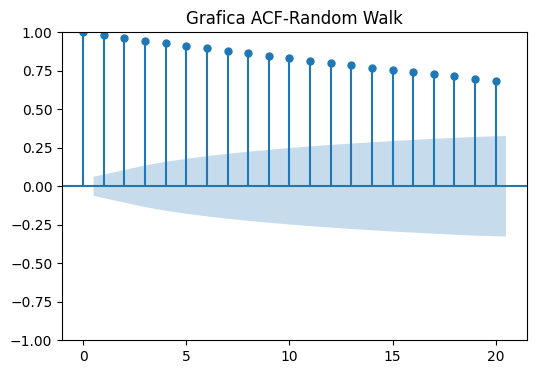

In [ ]:
plot_acf(random_walk, lags=20)
plt.title("Grafica ACF-Random Walk")
plt.show()

<body>
  <h1> Muchas gracias! 😀</h1>
</body>